In [4]:
!pip install gradio nltk --quiet
import nltk
nltk.download('punkt')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.6 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
import pandas as pd

df = pd.read_csv("/content/customer_support_tickets.csv")


print(df['Ticket Subject'].value_counts().head())


Ticket Subject
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Name: count, dtype: int64


In [13]:
from nltk.chat.util import Chat, reflections

pairs = [

    # Refund-related
    [r"(.*)refund(.*)", ["Refunds are processed within 5–7 business days."]],
    [r"(.*)money back(.*)", ["We process refunds in 5–7 business days."]],
    [r"(.*)return my money(.*)", ["We’ve initiated your refund. Please wait 5–7 business days."]],
    [r"(.*)how to get refund(.*)", ["You can request a refund from your order history page."]],
    [r"(.*)cancel and refund(.*)", ["Sure! Canceled orders are automatically refunded."]],

    # Password reset / login
    [r"(.*)reset password(.*)", ["You can reset your password from the login page."]],
    [r"(.*)forgot password(.*)", ["Click on ‘Forgot Password’ to reset it."]],
    [r"(.*)can.?t login(.*)", ["Make sure your email and password are correct."]],
    [r"(.*)login problem(.*)", ["Try resetting your password or clearing browser cache."]],
    [r"(.*)change password(.*)", ["Go to account settings to change your password."]],

    # Technical issues
    [r"(.*)not working(.*)", ["Please restart the app or try reinstalling it."]],
    [r"(.*)app crashed(.*)", ["Sorry about that. Please update the app and try again."]],
    [r"(.*)website down(.*)", ["We are working on it. Please check back soon."]],
    [r"(.*)error(.*)", ["Can you provide more details about the error you’re seeing?"]],
    [r"(.*)loading issue(.*)", ["Try refreshing the page or checking your internet connection."]],

    # Order tracking / delivery
    [r"(.*)track order(.*)", ["You can track your order using the tracking ID sent to your email."]],
    [r"(.*)where is my order(.*)", ["Let me check your order status. Can you provide your order ID?"]],
    [r"(.*)delivery status(.*)", ["Orders are typically delivered within 3–5 days."]],
    [r"(.*)order late(.*)", ["We’re sorry! Delivery may be delayed due to high demand."]],
    [r"(.*)when will I receive(.*)", ["Your order is on the way! Expect delivery soon."]],

    # Payment issues
    [r"(.*)payment failed(.*)", ["Please try another payment method or contact your bank."]],
    [r"(.*)card not working(.*)", ["Try using a different card or check for any limit issues."]],
    [r"(.*)payment error(.*)", ["Check if your card is valid and try again."]],
    [r"(.*)paid but no confirmation(.*)", ["Please wait a few minutes, or contact support with your receipt."]],

    # Greetings and polite messages
    [r"hi|hello|hey", ["Hello! How can I assist you today?"]],
    [r"good morning", ["Good morning! How can I help you today?"]],
    [r"good evening", ["Good evening! Need any help?"]],
    [r"thanks|thank you", ["You're welcome! Happy to help."]],
    [r"bye|goodbye", ["Take care! Let us know if you need anything else."]],

    # Fallback/default
    [r"(.*)", ["Sorry, can you rephrase that or provide more details?"]]
]

chatbot = Chat(pairs, reflections)
print("Welcome to Customer Support Chatbot! (type 'quit' to exit)")
chatbot.converse()


Welcome to Customer Support Chatbot! (type 'quit' to exit)
>quit
Sorry, can you rephrase that or provide more details?


In [10]:
import gradio as gr

def chatbot_response(msg):
    return chatbot.respond(msg)

gr.Interface(fn=chatbot_response, inputs="text", outputs="text", title="Support Chatbot").launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://97bd9e68e6315cbe82.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


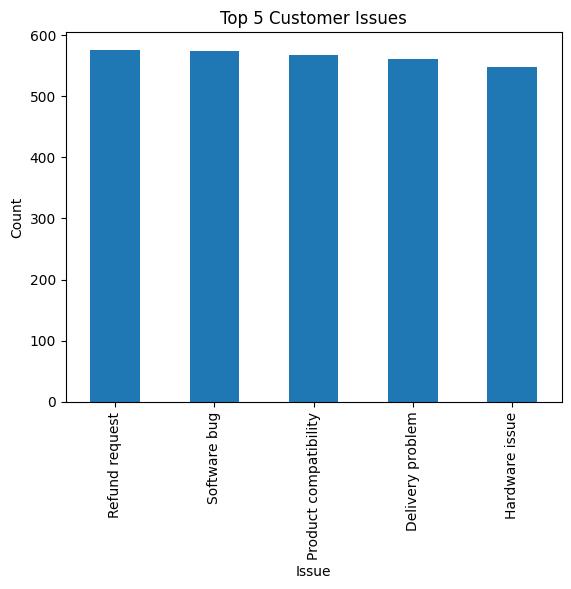

In [11]:
import matplotlib.pyplot as plt

df['Ticket Subject'].value_counts().head(5).plot(kind='bar', title='Top 5 Customer Issues')
plt.xlabel("Issue")
plt.ylabel("Count")
plt.show()
